In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/customer_data.csv")

In [3]:
data.head(100)

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,preferred_device,city,country,is_purchased_next_30
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,mobile,Kandy,Sri Lanka,0
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,desktop,Matara,Sri Lanka,0
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,mobile,Colombo,Sri Lanka,0
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,desktop,Jaffna,Sri Lanka,1
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,mobile,Galle,Sri Lanka,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,C100095,2020-05-26,2022-02-20,NaN,0.00,0.00,1,0,1892,mobile,Kandy,Sri Lanka,1
96,C100096,2023-06-01,2023-10-29,2023-06-25,46.93,72.77,1,1,767,desktop,Kurunegala,Sri Lanka,1
97,C100097,2023-07-24,2023-11-24,NaN,0.00,0.00,1,0,738,mobile,Kurunegala,Sri Lanka,0
98,C100098,2020-12-16,2023-08-15,2022-09-10,56.17,5.00,1,1,1055,mobile,Jaffna,Sri Lanka,0


In [4]:
data.shape

(5000, 13)

In [5]:
## group by each categoricat variables 

In [6]:
data.groupby('country')['country'].agg('count')

country
Sri Lanka    5000
Name: country, dtype: int64

In [7]:
data.groupby('preferred_device')['preferred_device'].agg('count')

preferred_device
desktop    1473
mobile     3277
tablet      250
Name: preferred_device, dtype: int64

In [8]:
data.groupby('city')['city'].agg('count')

city
Anuradhapura    615
Colombo         582
Galle           650
Jaffna          613
Kandy           652
Kurunegala      628
Matara          651
Negombo         609
Name: city, dtype: int64

In [9]:
## data cleaning process

In [10]:
data.isnull().sum()

customer_id                    0
signup_date                    0
last_activity_date             0
last_purchase_date          1996
total_spent                    0
avg_cart_value                 0
num_visits_30d                 0
num_purchases_90d              0
days_since_last_purchase       0
preferred_device               0
city                           0
country                        0
is_purchased_next_30           0
dtype: int64

In [11]:
## covert the text values into numerical values

In [12]:
dummies = pd.get_dummies(data.city)
dummies

,Anuradhapura,Colombo,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo
0,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4995,False,False,True,False,False,False,False,False
4996,False,True,False,False,False,False,False,False
4997,False,False,False,True,False,False,False,False
4998,False,False,False,False,False,False,False,True


In [13]:
data_town = pd.DataFrame(dummies)

In [14]:
data_town = data_town.astype(int)
data_town

,Anuradhapura,Colombo,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo
0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4995,0,0,1,0,0,0,0,0
4996,0,1,0,0,0,0,0,0
4997,0,0,0,1,0,0,0,0
4998,0,0,0,0,0,0,0,1


In [15]:
## drop the city column from the data set

In [16]:
data = data.drop(['city'],axis='columns')
data

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,preferred_device,country,is_purchased_next_30
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,mobile,Sri Lanka,0
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,desktop,Sri Lanka,0
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,mobile,Sri Lanka,0
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,desktop,Sri Lanka,1
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,mobile,Sri Lanka,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaN,0.00,0.00,4,0,1033,mobile,Sri Lanka,0
4996,C104996,2020-11-10,2021-08-17,NaN,0.00,0.00,4,0,1724,mobile,Sri Lanka,0
4997,C104997,2020-04-21,2020-09-12,NaN,0.00,0.00,3,0,1927,mobile,Sri Lanka,0
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,desktop,Sri Lanka,0


In [17]:
data.shape

(5000, 12)

In [18]:
## next we join the data_town into original data set as numerical value format without text

In [19]:
merged = pd.concat([data,data_town],axis='columns')
merged

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,preferred_device,country,is_purchased_next_30,Anuradhapura,Colombo,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,mobile,Sri Lanka,0,0,0,0,0,1,0,0,0
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,desktop,Sri Lanka,0,0,0,0,0,0,0,1,0
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,mobile,Sri Lanka,0,0,1,0,0,0,0,0,0
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,desktop,Sri Lanka,1,0,0,0,1,0,0,0,0
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,mobile,Sri Lanka,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaN,0.00,0.00,4,0,1033,mobile,Sri Lanka,0,0,0,1,0,0,0,0,0
4996,C104996,2020-11-10,2021-08-17,NaN,0.00,0.00,4,0,1724,mobile,Sri Lanka,0,0,1,0,0,0,0,0,0
4997,C104997,2020-04-21,2020-09-12,NaN,0.00,0.00,3,0,1927,mobile,Sri Lanka,0,0,0,0,1,0,0,0,0
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,desktop,Sri Lanka,0,0,0,0,0,0,0,0,1


In [20]:
merged.shape

(5000, 20)

In [21]:
## again drop the preferred_device column

In [22]:
merged = merged.drop(['preferred_device'],axis='columns')
merged

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,country,is_purchased_next_30,Anuradhapura,Colombo,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,Sri Lanka,0,0,0,0,0,1,0,0,0
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,Sri Lanka,0,0,0,0,0,0,0,1,0
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,Sri Lanka,0,0,1,0,0,0,0,0,0
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,Sri Lanka,1,0,0,0,1,0,0,0,0
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,Sri Lanka,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaN,0.00,0.00,4,0,1033,Sri Lanka,0,0,0,1,0,0,0,0,0
4996,C104996,2020-11-10,2021-08-17,NaN,0.00,0.00,4,0,1724,Sri Lanka,0,0,1,0,0,0,0,0,0
4997,C104997,2020-04-21,2020-09-12,NaN,0.00,0.00,3,0,1927,Sri Lanka,0,0,0,0,1,0,0,0,0
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,Sri Lanka,0,0,0,0,0,0,0,0,1


In [23]:
merged.shape

(5000, 19)

In [24]:
## convert the numerical values that happened in textual format in preferred_device column

In [25]:
dummies2 = pd.get_dummies(data.preferred_device)
dummies2

,desktop,mobile,tablet
0,False,True,False
1,True,False,False
2,False,True,False
3,True,False,False
4,False,True,False
...,...,...,...
4995,False,True,False
4996,False,True,False
4997,False,True,False
4998,True,False,False


In [26]:
df = dummies2.astype(int)
df

,desktop,mobile,tablet
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
4995,0,1,0
4996,0,1,0
4997,0,1,0
4998,1,0,0


In [27]:
merged2 = pd.concat([merged,df],axis='columns')
merged2

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,country,...,Colombo,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo,desktop,mobile,tablet
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,Sri Lanka,...,0,0,0,1,0,0,0,0,1,0
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,Sri Lanka,...,0,0,0,0,0,1,0,1,0,0
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,Sri Lanka,...,1,0,0,0,0,0,0,0,1,0
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,Sri Lanka,...,0,0,1,0,0,0,0,1,0,0
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,Sri Lanka,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaN,0.00,0.00,4,0,1033,Sri Lanka,...,0,1,0,0,0,0,0,0,1,0
4996,C104996,2020-11-10,2021-08-17,NaN,0.00,0.00,4,0,1724,Sri Lanka,...,1,0,0,0,0,0,0,0,1,0
4997,C104997,2020-04-21,2020-09-12,NaN,0.00,0.00,3,0,1927,Sri Lanka,...,0,0,1,0,0,0,0,0,1,0
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,Sri Lanka,...,0,0,0,0,0,0,1,1,0,0


In [28]:
merged2.shape

(5000, 22)

In [29]:
## again we can convert country name into integer values

In [30]:
dummies3 = pd.get_dummies(data.country)
dummies3

,Sri Lanka
0,True
1,True
2,True
3,True
4,True
...,...
4995,True
4996,True
4997,True
4998,True


In [31]:
data_country = pd.DataFrame(dummies3)
data_country

,Sri Lanka
0,True
1,True
2,True
3,True
4,True
...,...
4995,True
4996,True
4997,True
4998,True


In [32]:
data_country = data_country.astype(int)
data_country

,Sri Lanka
0,1
1,1
2,1
3,1
4,1
...,...
4995,1
4996,1
4997,1
4998,1


In [33]:
merged3 = pd.concat([merged2,data_country],axis='columns')
merged3

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,country,...,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo,desktop,mobile,tablet,Sri Lanka
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,Sri Lanka,...,0,0,1,0,0,0,0,1,0,1
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,Sri Lanka,...,0,0,0,0,1,0,1,0,0,1
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,Sri Lanka,...,0,0,0,0,0,0,0,1,0,1
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,Sri Lanka,...,0,1,0,0,0,0,1,0,0,1
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,Sri Lanka,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaN,0.00,0.00,4,0,1033,Sri Lanka,...,1,0,0,0,0,0,0,1,0,1
4996,C104996,2020-11-10,2021-08-17,NaN,0.00,0.00,4,0,1724,Sri Lanka,...,0,0,0,0,0,0,0,1,0,1
4997,C104997,2020-04-21,2020-09-12,NaN,0.00,0.00,3,0,1927,Sri Lanka,...,0,1,0,0,0,0,0,1,0,1
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,Sri Lanka,...,0,0,0,0,0,1,1,0,0,1


In [34]:
## let's drop the country

In [35]:
merged3 = merged3.drop(['country'],axis='columns')
merged3

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,is_purchased_next_30,...,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo,desktop,mobile,tablet,Sri Lanka
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,0,...,0,0,1,0,0,0,0,1,0,1
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,0,...,0,0,0,0,1,0,1,0,0,1
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,0,...,0,0,0,0,0,0,0,1,0,1
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,1,...,0,1,0,0,0,0,1,0,0,1
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaN,0.00,0.00,4,0,1033,0,...,1,0,0,0,0,0,0,1,0,1
4996,C104996,2020-11-10,2021-08-17,NaN,0.00,0.00,4,0,1724,0,...,0,0,0,0,0,0,0,1,0,1
4997,C104997,2020-04-21,2020-09-12,NaN,0.00,0.00,3,0,1927,0,...,0,1,0,0,0,0,0,1,0,1
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,0,...,0,0,0,0,0,1,1,0,0,1


In [36]:
merged3.shape

(5000, 22)

In [37]:
merged3

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,is_purchased_next_30,...,Galle,Jaffna,Kandy,Kurunegala,Matara,Negombo,desktop,mobile,tablet,Sri Lanka
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,0,...,0,0,1,0,0,0,0,1,0,1
1,C100001,2020-08-16,2020-11-13,NaN,0.00,0.00,0,0,1810,0,...,0,0,0,0,1,0,1,0,0,1
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,0,...,0,0,0,0,0,0,0,1,0,1
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,1,...,0,1,0,0,0,0,1,0,0,1
4,C100004,2021-07-17,2023-05-25,NaN,0.00,0.00,2,0,1475,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaN,0.00,0.00,4,0,1033,0,...,1,0,0,0,0,0,0,1,0,1
4996,C104996,2020-11-10,2021-08-17,NaN,0.00,0.00,4,0,1724,0,...,0,0,0,0,0,0,0,1,0,1
4997,C104997,2020-04-21,2020-09-12,NaN,0.00,0.00,3,0,1927,0,...,0,1,0,0,0,0,0,1,0,1
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,0,...,0,0,0,0,0,1,1,0,0,1


In [38]:
# Convert to datetime
merged3['last_purchase_date'] = pd.to_datetime(merged3['last_purchase_date'], errors='coerce')

# Today's date for recency calculation
today = pd.Timestamp.today()




In [39]:
#  Recency: Days since last purchase
merged3['recency_days'] = (today - merged3['last_purchase_date']).dt.days
merged3['recency_days'] = merged3['recency_days'].fillna(merged3['recency_days'].max() + 1)  


In [40]:
#  Frequency: Purchases in last 90 days
merged3['frequency_90d'] = merged3['num_purchases_90d']

#  Monetary: Total amount spent
merged3['monetary_total'] = merged3['total_spent']

#  Average spend per purchase (if purchases > 0)
merged3['avg_spend_per_purchase'] = merged3.apply(
    lambda row: row['monetary_total'] / row['num_purchases_90d'] if row['num_purchases_90d'] > 0 else 0,
    axis=1
) 


In [41]:
#  Visit patterns: visits per month (from 30d visits)
merged3['visits_per_month'] = merged3['num_visits_30d']

#  Purchase to visit ratio (conversion rate)
merged3['purchase_visit_ratio'] = merged3.apply(
    lambda row: row['num_purchases_90d'] / row['num_visits_30d'] if row['num_visits_30d'] > 0 else 0,
    axis=1
) 

In [42]:
#  High-value customer flag (top 20% monetary value)
threshold = merged3['monetary_total'].quantile(0.80)
merged3['high_value_customer'] = (merged3['monetary_total'] >= threshold).astype(int)

In [43]:
#  Engaged visitor flag (top 20% visits)
visit_threshold = merged3['visits_per_month'].quantile(0.80)
merged3['engaged_visitor'] = (merged3['visits_per_month'] >= visit_threshold).astype(int)

# Drop raw date if desired
# df.drop(columns=['last_purchase_date'], inplace=True)

print(merged3.head())

  customer_id signup_date last_activity_date last_purchase_date  total_spent  \
0     C100000  2023-08-02         2024-10-12         2023-10-27       397.81   
1     C100001  2020-08-16         2020-11-13                NaT         0.00   
2     C100002  2020-02-21         2020-12-18         2020-08-28        33.25   
3     C100003  2024-02-27         2026-06-19         2025-09-15        77.56   
4     C100004  2021-07-17         2023-05-25                NaT         0.00   

   avg_cart_value  num_visits_30d  num_purchases_90d  \
0           22.76               0                  0   
1            0.00               0                  0   
2           51.38               1                  1   
3           32.41               1                  2   
4            0.00               2                  0   

   days_since_last_purchase  is_purchased_next_30  ...  tablet  Sri Lanka  \
0                       643                     0  ...       0          1   
1                      1810 

In [44]:
merged3

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,is_purchased_next_30,...,tablet,Sri Lanka,recency_days,frequency_90d,monetary_total,avg_spend_per_purchase,visits_per_month,purchase_visit_ratio,high_value_customer,engaged_visitor
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,0,...,0,1,655.0,0,397.81,0.00,0,0.0,1,0
1,C100001,2020-08-16,2020-11-13,NaT,0.00,0.00,0,0,1810,0,...,0,1,2032.0,0,0.00,0.00,0,0.0,0,0
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,0,...,0,1,1810.0,1,33.25,33.25,1,1.0,0,0
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,1,...,0,1,-34.0,2,77.56,38.78,1,2.0,0,0
4,C100004,2021-07-17,2023-05-25,NaT,0.00,0.00,2,0,1475,0,...,0,1,2032.0,0,0.00,0.00,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaT,0.00,0.00,4,0,1033,0,...,0,1,2032.0,0,0.00,0.00,4,0.0,0,1
4996,C104996,2020-11-10,2021-08-17,NaT,0.00,0.00,4,0,1724,0,...,0,1,2032.0,0,0.00,0.00,4,0.0,0,1
4997,C104997,2020-04-21,2020-09-12,NaT,0.00,0.00,3,0,1927,0,...,0,1,2032.0,0,0.00,0.00,3,0.0,0,1
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,0,...,0,1,1125.0,1,284.57,284.57,2,0.5,1,0


In [45]:
merged3.drop(['num_visits_30d'],axis='columns')
merged3

,customer_id,signup_date,last_activity_date,last_purchase_date,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,is_purchased_next_30,...,tablet,Sri Lanka,recency_days,frequency_90d,monetary_total,avg_spend_per_purchase,visits_per_month,purchase_visit_ratio,high_value_customer,engaged_visitor
0,C100000,2023-08-02,2024-10-12,2023-10-27,397.81,22.76,0,0,643,0,...,0,1,655.0,0,397.81,0.00,0,0.0,1,0
1,C100001,2020-08-16,2020-11-13,NaT,0.00,0.00,0,0,1810,0,...,0,1,2032.0,0,0.00,0.00,0,0.0,0,0
2,C100002,2020-02-21,2020-12-18,2020-08-28,33.25,51.38,1,1,1798,0,...,0,1,1810.0,1,33.25,33.25,1,1.0,0,0
3,C100003,2024-02-27,2026-06-19,2025-09-15,77.56,32.41,1,2,-46,1,...,0,1,-34.0,2,77.56,38.78,1,2.0,0,0
4,C100004,2021-07-17,2023-05-25,NaT,0.00,0.00,2,0,1475,0,...,0,1,2032.0,0,0.00,0.00,2,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C104995,2022-10-02,2023-02-02,NaT,0.00,0.00,4,0,1033,0,...,0,1,2032.0,0,0.00,0.00,4,0.0,0,1
4996,C104996,2020-11-10,2021-08-17,NaT,0.00,0.00,4,0,1724,0,...,0,1,2032.0,0,0.00,0.00,4,0.0,0,1
4997,C104997,2020-04-21,2020-09-12,NaT,0.00,0.00,3,0,1927,0,...,0,1,2032.0,0,0.00,0.00,3,0.0,0,1
4998,C104998,2022-01-08,2024-02-22,2022-07-14,284.57,49.99,2,1,1113,0,...,0,1,1125.0,1,284.57,284.57,2,0.5,1,0


In [46]:
merged3.shape

(5000, 30)

In [47]:
## Train the model using Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [50]:
y = merged3['is_purchased_next_30']


In [51]:
# Columns to exclude
exclude_columns = ['customer_id', 'signup_date', 'last_activity_date', 'last_purchase_date', 'is_purchased_next_30']

X = merged3.drop(columns=exclude_columns)


In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [53]:
X_train

,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,Anuradhapura,Colombo,Galle,Jaffna,Kandy,...,tablet,Sri Lanka,recency_days,frequency_90d,monetary_total,avg_spend_per_purchase,visits_per_month,purchase_visit_ratio,high_value_customer,engaged_visitor
1069,0.00,0.00,2,0,1060,0,0,1,0,0,...,0,1,2032.0,0,0.00,0.000000,2,0.0,0,0
4887,76.05,55.14,1,0,1113,1,0,0,0,0,...,0,1,1125.0,0,76.05,0.000000,1,0.0,0,0
1883,90.83,40.94,0,0,890,0,0,0,0,0,...,0,1,902.0,0,90.83,0.000000,0,0.0,0,0
1949,181.76,51.80,0,3,894,0,0,1,0,0,...,0,1,906.0,3,181.76,60.586667,0,0.0,1,0
2130,125.47,30.16,2,2,894,0,0,0,1,0,...,0,1,906.0,2,125.47,62.735000,2,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3923,112.61,49.07,1,3,46,1,0,0,0,0,...,0,1,58.0,3,112.61,37.536667,1,3.0,0,0
1572,53.86,44.05,2,2,129,0,1,0,0,0,...,0,1,141.0,2,53.86,26.930000,2,1.0,0,0
1836,0.00,0.00,3,0,618,0,0,0,0,0,...,0,1,2032.0,0,0.00,0.000000,3,0.0,0,1
680,0.00,0.00,3,0,787,0,0,0,1,0,...,0,1,2032.0,0,0.00,0.000000,3,0.0,0,1


In [54]:
merged3.isnull().sum()

customer_id                    0
signup_date                    0
last_activity_date             0
last_purchase_date          1996
total_spent                    0
avg_cart_value                 0
num_visits_30d                 0
num_purchases_90d              0
days_since_last_purchase       0
is_purchased_next_30           0
Anuradhapura                   0
Colombo                        0
Galle                          0
Jaffna                         0
Kandy                          0
Kurunegala                     0
Matara                         0
Negombo                        0
desktop                        0
mobile                         0
tablet                         0
Sri Lanka                      0
recency_days                   0
frequency_90d                  0
monetary_total                 0
avg_spend_per_purchase         0
visits_per_month               0
purchase_visit_ratio           0
high_value_customer            0
engaged_visitor                0
dtype: int

In [55]:
len(X_train)

4000

In [56]:
X_test

,total_spent,avg_cart_value,num_visits_30d,num_purchases_90d,days_since_last_purchase,Anuradhapura,Colombo,Galle,Jaffna,Kandy,...,tablet,Sri Lanka,recency_days,frequency_90d,monetary_total,avg_spend_per_purchase,visits_per_month,purchase_visit_ratio,high_value_customer,engaged_visitor
2552,0.00,0.00,3,0,997,0,0,0,0,1,...,0,1,2032.0,0,0.00,0.00,3,0.00,0,1
2033,71.88,42.32,2,0,1425,0,0,0,0,0,...,0,1,1437.0,0,71.88,0.00,2,0.00,0,0
4760,0.00,0.00,1,0,382,0,1,0,0,0,...,0,1,2032.0,0,0.00,0.00,1,0.00,0,0
3231,0.00,0.00,2,0,1532,0,0,0,0,0,...,0,1,2032.0,0,0.00,0.00,2,0.00,0,0
4351,0.00,0.00,4,0,2010,1,0,0,0,0,...,0,1,2032.0,0,0.00,0.00,4,0.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.00,0.00,2,0,1205,0,0,0,1,0,...,0,1,2032.0,0,0.00,0.00,2,0.00,0,0
2531,192.06,58.71,4,3,796,0,0,0,0,0,...,0,1,808.0,3,192.06,64.02,4,0.75,1,1
1458,136.41,41.07,0,0,-280,0,0,0,0,0,...,0,1,-268.0,0,136.41,0.00,0,0.00,0,0
4226,348.66,33.05,4,1,1664,0,0,0,0,0,...,0,1,1676.0,1,348.66,348.66,4,0.25,1,1


In [57]:
len(X_test)

1000

In [58]:
## fit the model

In [59]:
model.fit(X_train,y_train)

c:\Users\USER\.conda\envs\assignment\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [60]:
## measure the accuracy of the model

In [61]:
model.score(X_test,y_test)

0.805

In [62]:
## evaluation model using confusion matrix

In [63]:
y_predicted = model.predict(X_test)

In [64]:
y_probs = model.predict_proba(X_test)[:, 1] 

In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [66]:
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted)
recall = recall_score(y_test, y_predicted)
f1 = f1_score(y_test, y_predicted)
roc_auc = roc_auc_score(y_test, y_probs)

In [67]:
## Accuracy of that evaluation methods

In [68]:
print(f"Accuracy:  {accuracy:.4f}")

Accuracy:  0.8050


In [69]:
print(f"Precision: {precision:.4f}")

Precision: 0.4255


In [70]:
print(f"Recall:    {recall:.4f}")

Recall:    0.1064


In [71]:
print(f"F1 Score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")

F1 Score:  0.1702
ROC-AUC:   0.6781


In [72]:
## final evaluation of the logistic regression
# "The logistic regression model achieved a precision of 42.55%,
#  recall of 10.64%, F1 score of 17.02%, and ROC-AUC of 0.6781 on the test set. 
# While the ROC-AUC indicates the model performs better than random chance,
#  the low recall suggests it misses most actual purchasers. For this problem, 
# where identifying potential purchasers is important, this performance is insufficient.
#  We recommend improving class balance and experimenting with threshold tuning or alternative models
#  to increase recall while maintaining acceptable precision."

In [73]:
## creating a simple neural network

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)


In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [76]:
## create the model

In [77]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train1.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='sigmoid'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  
])

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
## compile the model

In [79]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

In [80]:
## fit the model

In [81]:
model.fit(
    X_train1, y_train,
    validation_data=(X_test1, y_test),
    epochs=30,
    batch_size=32,
    verbose=1
)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8108 - loss: 0.5003 - precision: 0.2222 - recall: 0.0027 - val_accuracy: 0.8120 - val_loss: 0.4622 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8105 - loss: 0.4700 - precision: 0.2000 - recall: 0.0027 - val_accuracy: 0.8120 - val_loss: 0.4531 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8115 - loss: 0.4601 - precision: 0.4500 - recall: 0.0120 - val_accuracy: 0.8120 - val_loss: 0.4482 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8115 - loss: 0.4555 - precision: 0.4583 - recall: 0.0146 - val_accuracy: 0.8120 - val_loss: 0.4463 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8125 - loss: 0.4537 - precision: 0.5417 - recall: 0.0173 - val

In [82]:
## model evaluate

In [83]:
model.evaluate(X_test1,y_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8120 - loss: 0.4438 - precision: 0.0000e+00 - recall: 0.0000e+00 


[0.4438430368900299, 0.8119999766349792, 0.0, 0.0]

In [84]:
## intepretability
## Logistic Regression — Coefficient-based

In [85]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


c:\Users\USER\.conda\envs\assignment\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [86]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute importance
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

print(feature_importance[['Feature', 'Coefficient']])

                     Feature  Coefficient
24           engaged_visitor     1.138155
16                 Sri Lanka    -0.730747
15                    tablet    -0.261029
14                    mobile    -0.241997
13                   desktop    -0.227721
8                     Jaffna    -0.161215
11                    Matara    -0.149044
22      purchase_visit_ratio     0.145398
9                      Kandy    -0.140840
18             frequency_90d     0.133474
3          num_purchases_90d     0.133474
23       high_value_customer    -0.108667
7                      Galle    -0.092762
12                   Negombo    -0.088476
6                    Colombo    -0.078808
10                Kurunegala    -0.043806
5               Anuradhapura     0.024205
21          visits_per_month    -0.015874
2             num_visits_30d    -0.015874
20    avg_spend_per_purchase     0.004242
1             avg_cart_value     0.003985
19            monetary_total    -0.000945
0                total_spent    -0

In [87]:
## SHARP for logistic regression and neural netwoks

c:\Users\USER\.conda\envs\assignment\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


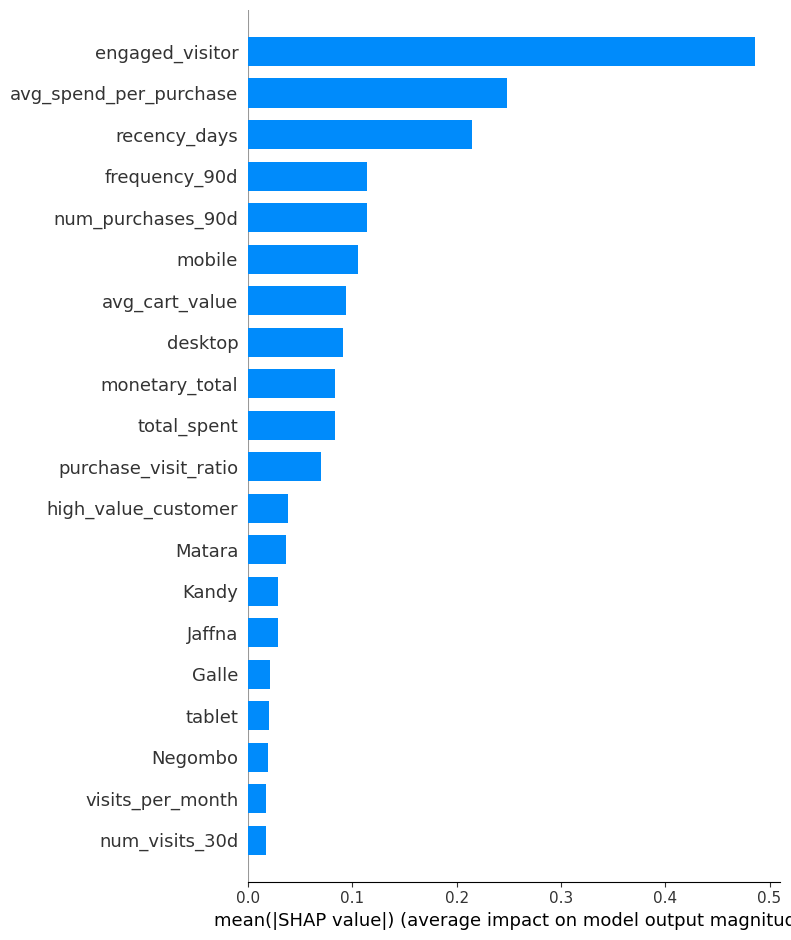

In [88]:
import shap

# Create explainer
explainer = shap.Explainer(model, X_train)
shap_val = explainer(X_test)

# Plot top features
shap.summary_plot(shap_val, X_test, plot_type="bar")


In [89]:
## Permutation Importance

In [90]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_data = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)




In [91]:
importance_data

,Feature,Importance
24,engaged_visitor,0.0103
13,desktop,0.0040
19,monetary_total,0.0020
0,total_spent,0.0020
15,tablet,0.0016
23,high_value_customer,0.0015
11,Matara,0.0014
6,Colombo,0.0010
20,avg_spend_per_purchase,0.0005
9,Kandy,0.0004
